In [42]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("hotels.csv")
df['Price'] = df['Price'].str.replace('VND', '', regex = False)
df['Price'] = df['Price'].str.replace(',', '', regex = False)
df['Price'] = df['Price'].str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [43]:
df['Distance from the centre'] = df['Distance from the centre'].str.extract(r'([\d.]+)').astype(float)
df.head()

,Name,Price,Rating,Distance from the centre,Free Cancellation,Prepayment needed,Breakfast included
0,CitiNest Residence Bui Vien Signature,5575500,8.7,1.0,Yes,No,No
1,NU House - Heart of District 1 - Walk to Every...,3511250,NaN,1.4,Yes,No,No
2,The L'anmien Quận 3,4090500,9.7,1.8,Yes,No,No
3,Hung Thanh Airport Hotel - Gần Siêu Thị Vincom...,6075000,6.7,5.4,Yes,No,No
4,The Cozy Nest,5703706,7.4,4.9,Yes,No,No


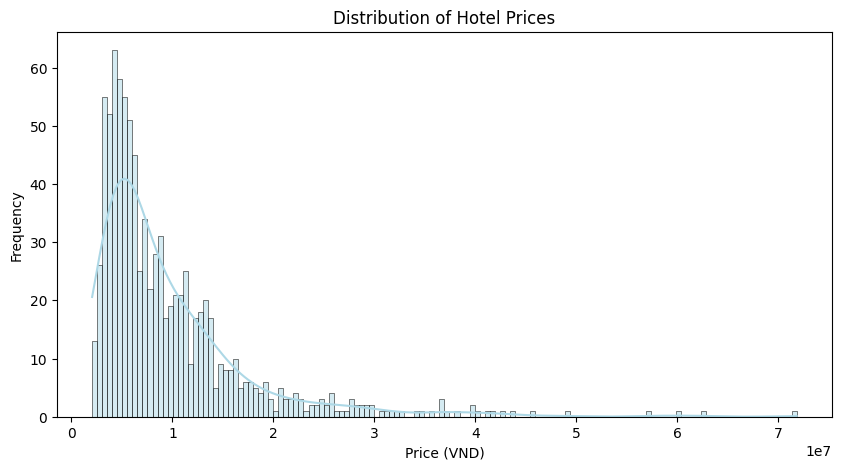

In [44]:
#Price distribution
plt.figure(figsize = (10,5))
sns.histplot(df['Price'], binwidth=500000, kde = True, color = 'lightblue')
plt.title("Distribution of Hotel Prices")
plt.xlabel("Price (VND)")
plt.ylabel("Frequency")
plt.show()

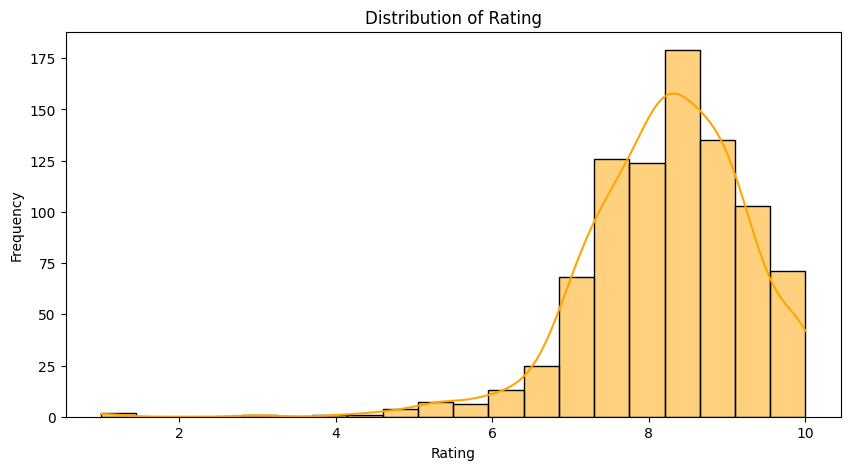

In [45]:
#Distribution of Rating
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

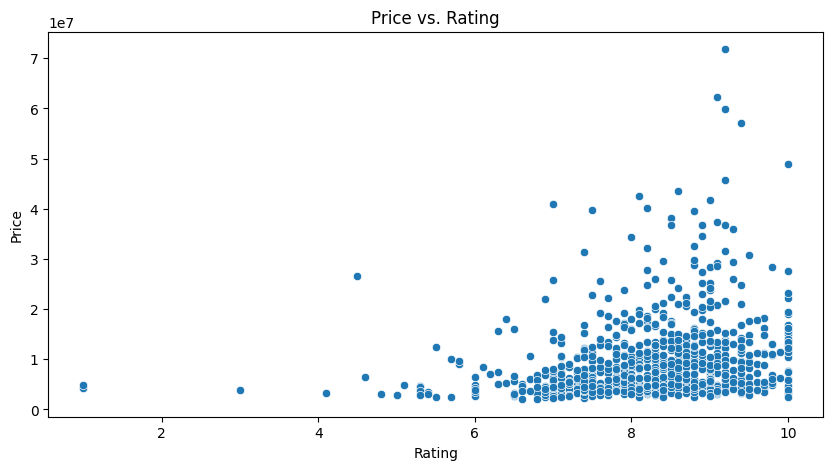

In [46]:
#Price vs. Rating
plt.figure(figsize=(10,5))
sns.scatterplot(x='Rating', y='Price', data=df)
plt.title("Price vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

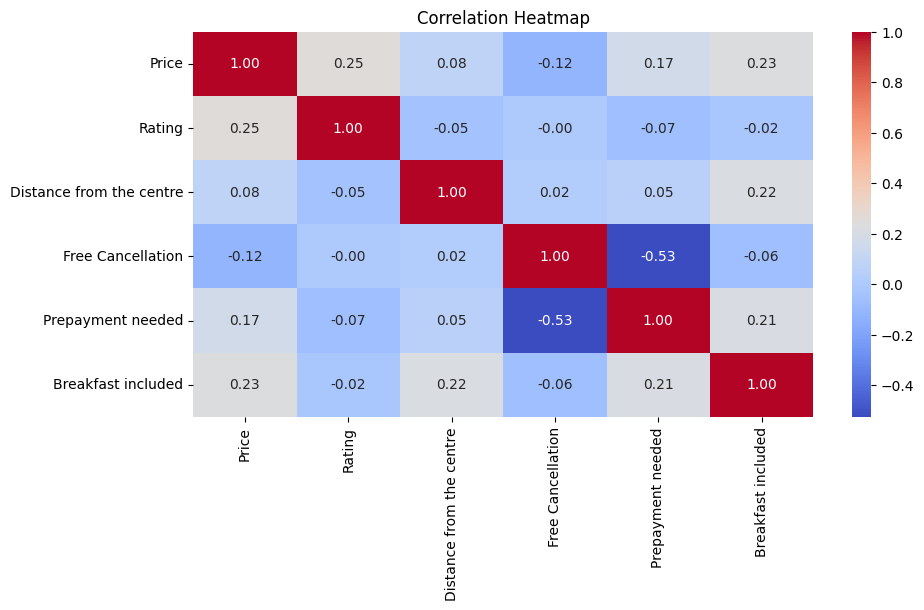

In [47]:
#Correlation Heatmap
binary_cols = ['Free Cancellation', 'Prepayment needed', 'Breakfast included']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10,5))
sns.heatmap(df[['Price', 'Rating', 'Distance from the centre', 'Free Cancellation', 'Prepayment needed','Breakfast included']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Rating', 'Distance from the centre', 'Free Cancellation', 'Prepayment needed','Breakfast included']]
y = df['Price']
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 4807185.193812621
RMSE: 6527121.076978411
R² Score: 0.15608279362331234


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


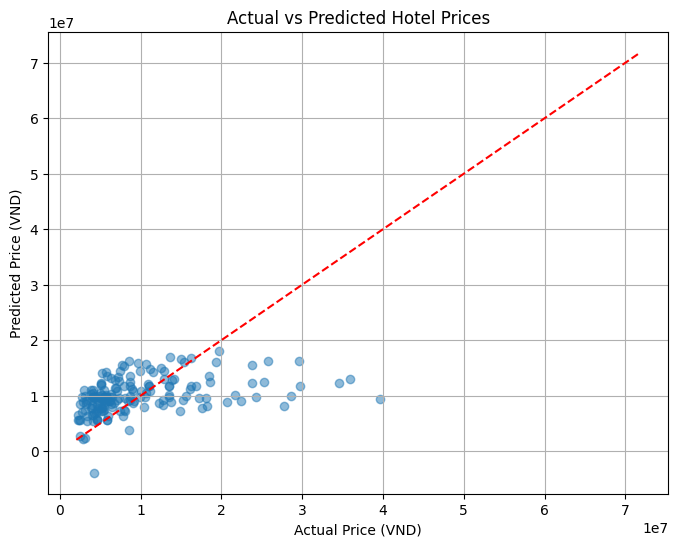

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Price (VND)")
plt.ylabel("Predicted Price (VND)")
plt.title("Actual vs Predicted Hotel Prices")
plt.grid(True)
plt.show()